## Informatics Collaboration Network - Full Graph

### Setup

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, csv
import networkx as nx
from helper import *
import pickle as pkl

In [2]:
DATA_DIR = '../../data/data_schoolofinf/'
# The lookup tables:
lookup_pub = pd.read_pickle(os.path.join(DATA_DIR, 'lookup_pub.pkl'))
pd_poinf = pd.read_pickle(os.path.join(DATA_DIR, 'lookup_poinf.pkl'))

In [3]:
# Only need the institute_clas and id:
pd_poinf.drop(
    labels=['full_name', 'last_name', 'first_name', 'institute', 'alias'],
    inplace=True,
    axis=1)

In [3]:
pd_poinf.head(3)

,last_name,first_name,personal_url,position,parent,institute,full_name,institute_class,alias
id,,,,,,,,,
23d17ab4-123f-4929-9373-763bd7587df8,alay,ozgu,http://www.research.ed.ac.uk/portal/en/persons...,visitor official visitor,school of informatics,UNKNOWN,alay ozgu,0,NaN
d089bb44-7d0b-4b3f-b556-27def993d1d1,albrecht,stefano,http://www.research.ed.ac.uk/portal/en/persons...,lecturer in artificial intelligence,school of informatics,centre for intelligent systems and their appli...,albrecht stefano,1,"albrecht, s. v.|albrecht, s."
ecd799fb-4f63-44ae-a078-b009099f2c8c,alex,beatrice,http://www.research.ed.ac.uk/portal/en/persons...,research fellow,school of informatics,institute of language cognition and computation,alex beatrice,2,"alex, b. (ed.)|alex, b.|symington, b."


In [5]:
institutes = pkl.load(open(os.path.join(DATA_DIR,'institutes.pkl'), 'rb'))

In [6]:
# Create a color map for each institute:
from helper import inst_by_color


---
## Full Graph Visualisation

In [4]:
lookup_pub.head(3)

,year,authors,shortnames,collab_id,edges
pub_id,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,d.p. o'brien|r. galvao|m. keilhacker|e. lazzar...,"brien, d. p.|galvao, r.|keilhacker, m.|lazzaro...","[328, 1970, 569, 5683, 5144, a78a09b5-138e-407...","[(328, 1970), (328, 569), (328, 5683), (328, 5..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,paolo guagliardo|piotr wieczorek,"guagliardo, p.|wieczorek, p.","[653c9723-b374-4ad3-9cef-0f7e7f45d812, 4998]","[(653c9723-b374-4ad3-9cef-0f7e7f45d812, 4998)]"
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,p. buneman|l. libkin|d. suciu|v. tannen|l. wong,"buneman, p.|libkin, l.|suciu, d.|tannen, v. |w...","[90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33f...","[(90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33..."


In [5]:
def fix_date(x):
    if len(str(x)) > 4:
        yr = int(x[-2:])
        if yr >= 50:
            return 1900 + yr
        else:
            return 2000 + yr
    else:
        return int(x)

In [6]:
lookup_pub['year'] = lookup_pub['year'].apply(lambda x: fix_date(x))

In [7]:
lookup_pub_20yrs=lookup_pub.drop(
    lookup_pub[(lookup_pub.year < 1997) | (lookup_pub.year > 2017)].index)

In [8]:
all_edges_20 = []
for listEdges in lookup_pub_20yrs.edges:
    all_edges_20.extend(listEdges)

In [9]:
g_full = nx.from_edgelist(all_edges_20)
nx.info(g_full)

'Name: \nType: Graph\nNumber of nodes: 7544\nNumber of edges: 34811\nAverage degree:   9.2288'

In [7]:
all_edges = []
for listEdges in lookup_pub.edges:
    all_edges.extend(listEdges)

In [8]:
g_full = nx.from_edgelist(all_edges)
pos = nx.spring_layout(g_full)

In [9]:
# light up the nodes based on the institutes they belong to:
def color_by_inst(g):
    node_color = []
    for node in g:
        if len(str(node)) > 5:
            k = int(pd_poinf.institute_class.loc[[str(node)]])
            node_color.append(inst_by_color[k])
        else:
            node_color.append(inst_by_color['others'])
    return node_color

In [10]:
def add_inst_labels(ax, with_legend=True):
    for label in institutes.values():
        ax.scatter(
            [0], [0],
            color=inst_by_color[label],
            label=[name for (name, _k) in institutes.items() if _k == label][0])
    ax.scatter([0],[0],
              color=inst_by_color['others'],
              label='external')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.scatter([0],[0], color='white', s=100, edgecolors='none')
    return ax

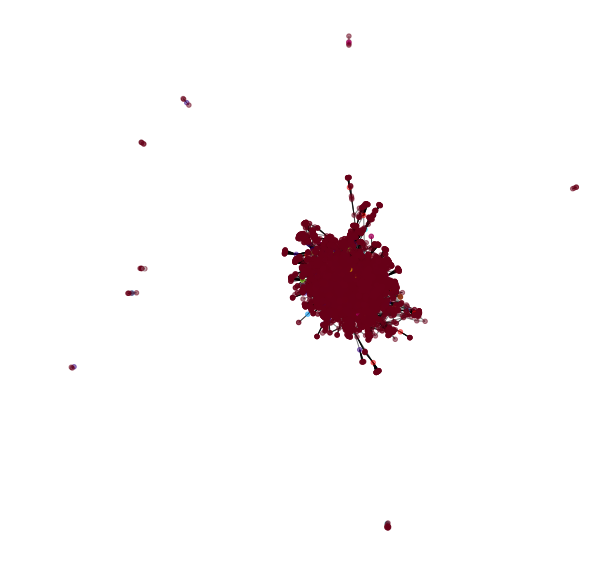

In [11]:
# visualise:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
# ax=add_inst_labels(ax)
ax.axis('off')
nx.draw_networkx(
    g_full,
    pos=pos,
    with_labels=False,
    ax=ax,
    alpha=.5,
    node_size=20,
    node_color=color_by_inst(g_full)
)
plt.savefig("IMG/full_graph.pdf", format='pdf', 
            bbox_inches="tight")

### Global statistics

In [12]:
g_full.name = 'Full collaboration Graph'
print(nx.info(g_full))

Name: Full collaboration Graph
Type: Graph
Number of nodes: 7973
Number of edges: 36239
Average degree:   9.0904


#### Degree distribution
In this section, we calculate the degree distribution of the collaboration graph, also providing apis for further degree distribution calculation

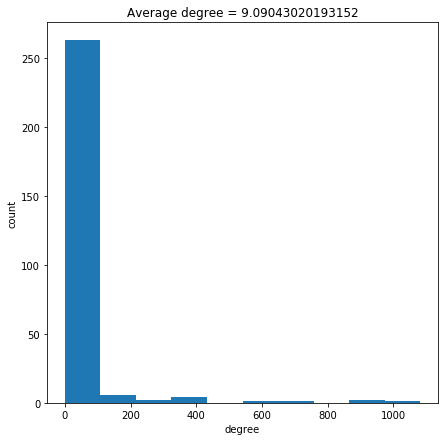

In [13]:
ax, degree_seq = degree_dist(g_full)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/weiting/miniconda3/envs/infnet3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/weiting/miniconda3/envs/infnet3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


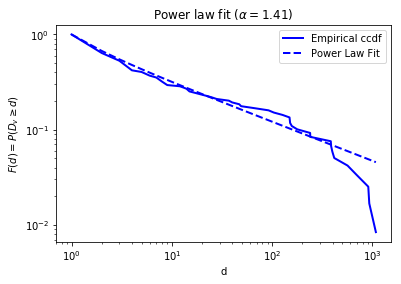

In [14]:
# $F(d) = (\frac{d}{d_{min}})^{-(\alpha-1)}$
fig = power_law_fit(degree_seq)
plt.savefig("IMG/full_graph-degreedist.pdf", format='pdf', 
            bbox_inches="tight")

#### Clustering Coefficients

In [15]:
cc = clustering_coeff(g_full)

In [16]:
print('average clustering coefficient: ', cc[1])

average clustering coefficient:  0.8137349917744195


In [17]:
# The number of triangles for each nodes
triangle_nodes = nx.triangles(g_full)
transitivity_graph = nx.transitivity(g_full)

In [18]:
print('Transitivity:',transitivity_graph)

Transitivity: 0.2910037157359813


#### Distance Measure for subgraphs

In [19]:
gccs, percentage = generateGCC(g_full)

component 1: 99.41%
component 2: 0.15%
component 3: 0.09%
component 4: 0.08%
component 5: 0.08%
component 6: 0.06%
component 7: 0.05%
component 8: 0.05%
component 9: 0.04%


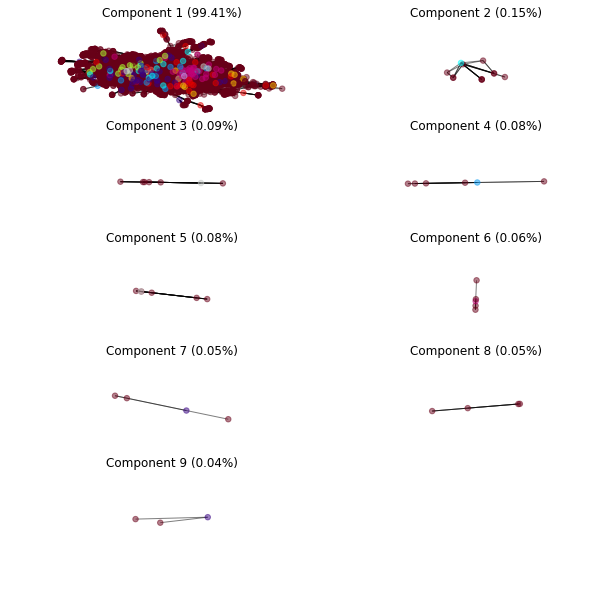

In [22]:
# display the connected components:
fig = plt.figure(figsize=(10,10))
num_col = np.ceil(len(gccs)/2)
for i, g in enumerate(gccs,1):
    percent = percentage[i-1]
    ax = fig.add_subplot(num_col,2,i)
    ax.axis('off')
    ax.set_title('Component {} ({:.2%})'.format(i, percent))
    nx.draw_networkx(
        g,
        node_color=color_by_inst(g),
        ax=ax,
        with_labels=False,
        alpha=.5,
        node_size=30,
        pos=pos)
plt.savefig("IMG/full_graph-gccs.pdf", format='pdf', 
            bbox_inches="tight")

## Largest Connected Component

In [23]:
main_gcc = gccs[0]
pos_gcc = nx.spring_layout(main_gcc)

In [24]:
print('number of nodes in largest connected component:', len(main_gcc))

number of nodes in largest connected component: 7926


In [25]:
print(nx.info(main_gcc))

Name: Full collaboration Graph
Type: Graph
Number of nodes: 7926
Number of edges: 36146
Average degree:   9.1209


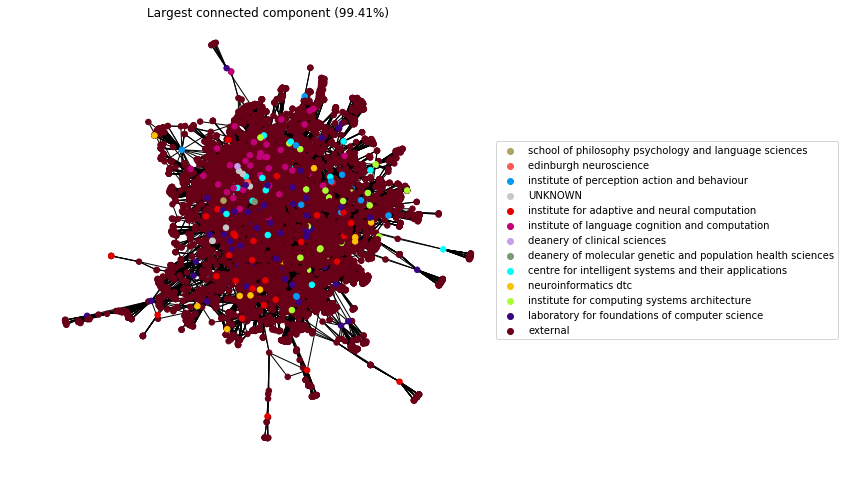

In [26]:
# Draw the graph:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax = add_inst_labels(ax)
ax.axis('off')
nx.draw_networkx(
    main_gcc,
    pos=pos_gcc,
    with_labels=False,
    ax=ax,
    node_size=30,
    node_color=color_by_inst(main_gcc))
ax.set_title('Largest connected component ({:.2%})'.format(percentage[0]))
plt.savefig("IMG/full_graph-LargestCC.pdf", format='pdf', bbox_inches="tight")

### Statistics

#### Degree Distribution

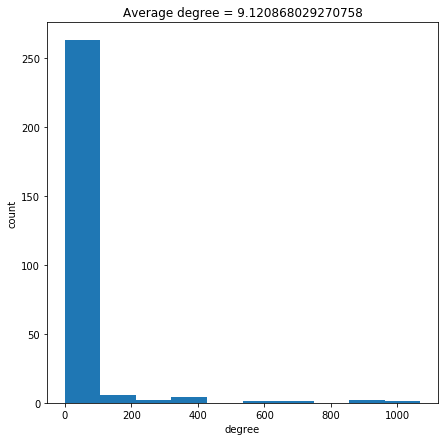

In [27]:
ax, degree_seq = degree_dist(main_gcc)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/weiting/miniconda3/envs/infnet3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/weiting/miniconda3/envs/infnet3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


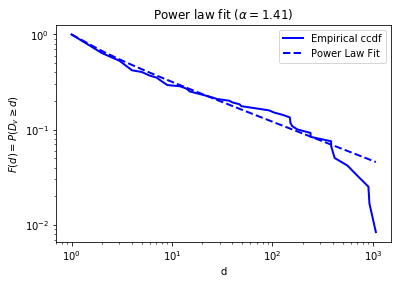

In [28]:
fig = power_law_fit(degree_seq)
plt.savefig("IMG/full_graph-LargestCC-powerlaw.pdf", format='pdf', 
            bbox_inches="tight")

#### Clustering coefficients

In [29]:
cc = clustering_coeff(main_gcc)
print('average clustering coefficient: ', cc[1])

average clustering coefficient:  0.8137090050802336


#### Average Path and Diameter

In [30]:
# Diameter:
print('Diameter of graph:', nx.diameter(main_gcc))

Diameter of graph: 10


In [31]:
print('Average Path: ', nx.average_shortest_path_length(main_gcc)) # AVERAGE PATH

Average Path:  4.624485130994825


### Community Detection
In this section, we use the [`community`](https://bitbucket.org/taynaud/python-louvain) package to detect communities in the largest connected component. 
We hypothesised that this will allow us to detect various institutes that have close working relationships

***Credit: https://blog.dominodatalab.com/social-network-analysis-with-networkx/***

In [32]:
import community

In [33]:
parts = community.best_partition(main_gcc)
values = [parts.get(node) for node in main_gcc.nodes()]

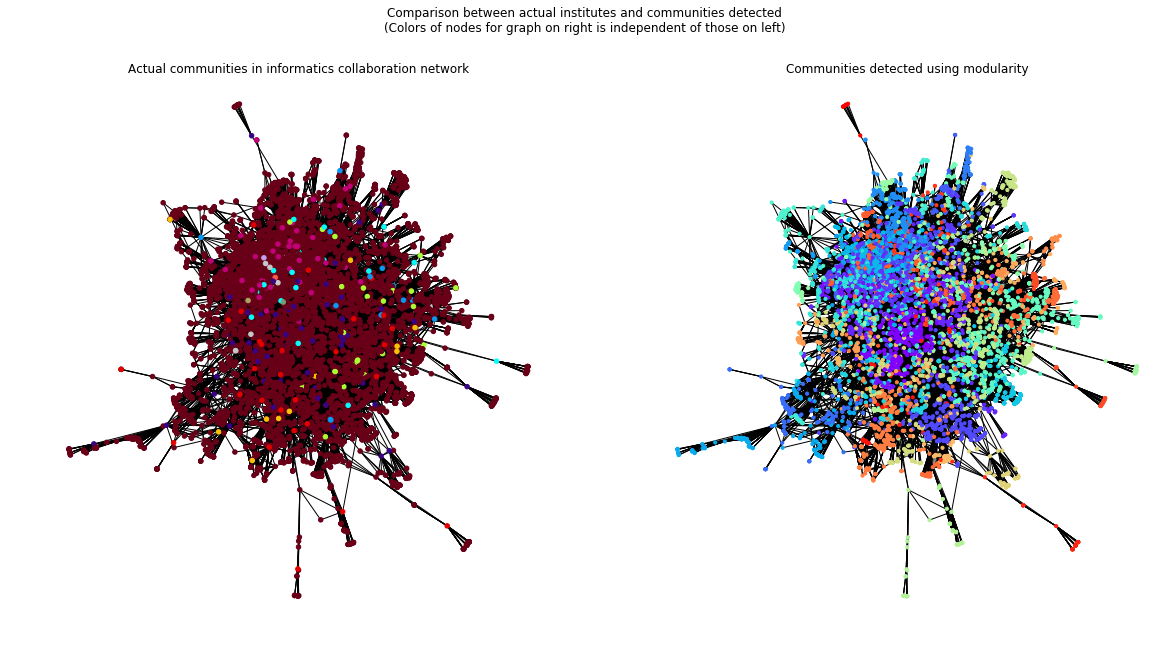

In [34]:
# Plot the graphs side by side:
fig = plt.figure(figsize=(20, 10))
fig.suptitle(
    'Comparison between actual institutes and communities detected\n(Colors of nodes for graph on right is independent of those on left)'
)
ax1 = fig.add_subplot(121)
ax1.set_title('Actual communities in informatics collaboration network')
ax1.axis('off')
nx.draw_networkx(
    main_gcc,
    pos=pos_gcc,
    with_labels=False,
    ax=ax1,
    node_size=20,
    node_color=color_by_inst(main_gcc))

ax2 = fig.add_subplot(122)
ax2.set_title('Communities detected using modularity')
ax2.axis('off')
nx.draw_networkx(
    main_gcc,
    pos=pos_gcc,
    cmap=plt.get_cmap("rainbow"),
    ax=ax2,
    node_color=values,
    node_size=10,
    with_labels=False)

plt.savefig(
    "IMG/full_graph-compareCommunities.pdf", format='pdf', bbox_inches="tight")

In [35]:
num_comm = len(set(parts.values()))
print('Number of communities detected =', num_comm)

Number of communities detected = 43


In [36]:
poinf_in_gcc = [n for n in main_gcc.nodes if n in pd_poinf.index]
poinf_edge = [
    a for a in main_gcc.edges
    if a[0] in pd_poinf.index and a[1] in pd_poinf.index
]

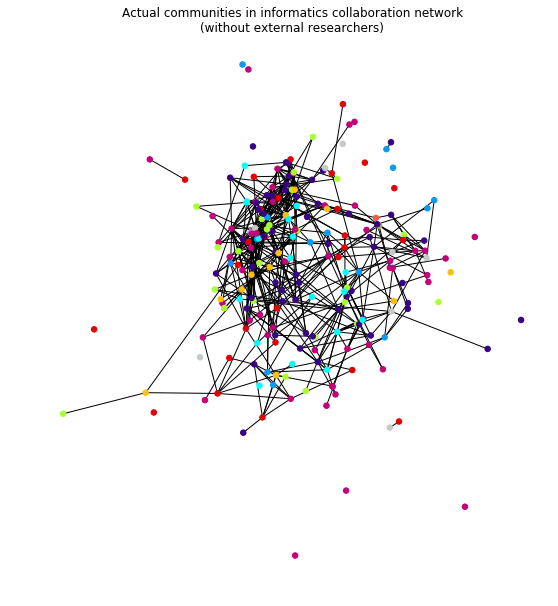

In [37]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121)
ax1.set_title('Actual communities in informatics collaboration network\n(without external researchers)')
ax1.axis('off')
nx.draw_networkx(
    main_gcc,
    pos=pos_gcc,
    with_labels=False,
    ax=ax1,
    nodelist=poinf_in_gcc,
    edgelist=poinf_edge,
    node_size=30,
    node_color=color_by_inst(nx.subgraph(main_gcc, poinf_in_gcc)))
plt.savefig(
    "IMG/full_graph-compareCommunities-big.pdf", format='pdf', bbox_inches="tight")

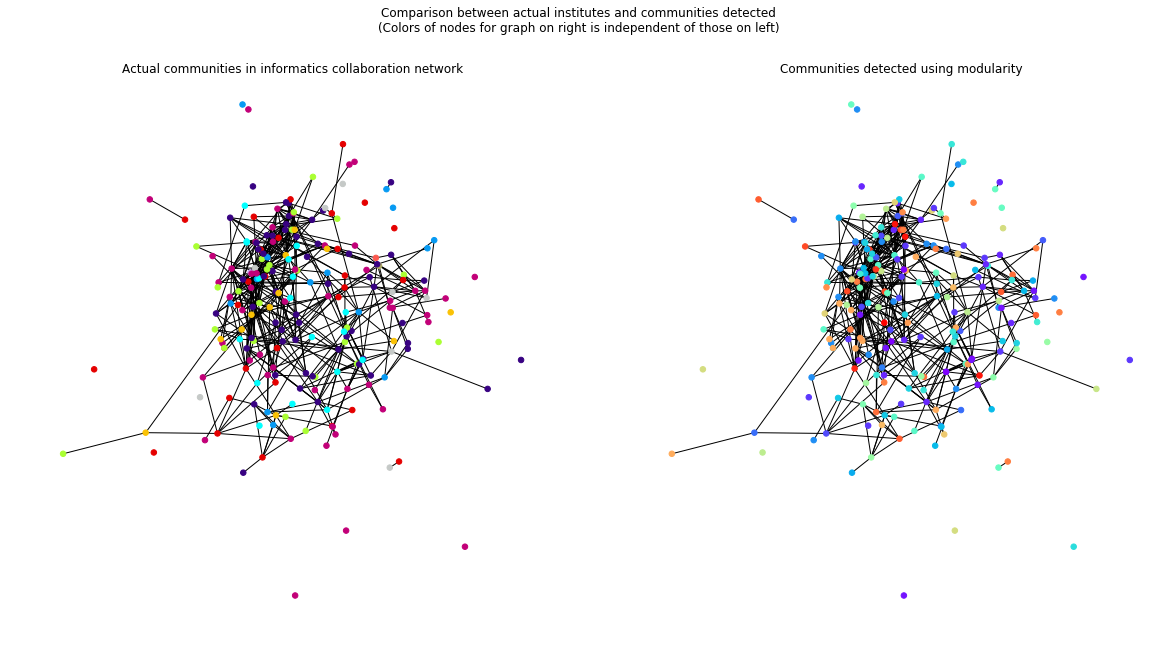

In [38]:
# Draw only nodes that are in informatics
# Plot the graphs side by side:
fig = plt.figure(figsize=(20, 10))
fig.suptitle(
    'Comparison between actual institutes and communities detected\n(Colors of nodes for graph on right is independent of those on left)'
)
ax1 = fig.add_subplot(121)
ax1.set_title('Actual communities in informatics collaboration network')
ax1.axis('off')
nx.draw_networkx(
    main_gcc,
    pos=pos_gcc,
    with_labels=False,
    ax=ax1,
    nodelist=poinf_in_gcc,
    edgelist=poinf_edge,
    node_size=30,
    node_color=color_by_inst(nx.subgraph(main_gcc, poinf_in_gcc)))

ax2 = fig.add_subplot(122)
ax2.set_title('Communities detected using modularity')
ax2.axis('off')
nx.draw_networkx(
    main_gcc,
    pos=pos_gcc,
    cmap=plt.get_cmap("rainbow"),
    ax=ax2,
    nodelist=poinf_in_gcc,
    edgelist=poinf_edge,
    node_size=30,
    node_color=[
        parts.get(node)
        for node in nx.subgraph(main_gcc, poinf_in_gcc).nodes()
    ],
    with_labels=False)

plt.savefig(
    "IMG/full_graph-compareCommunities-rmExt.pdf",
    format='pdf',
    bbox_inches="tight")

ValueError: num must be 1 <= num <= 42, not 43

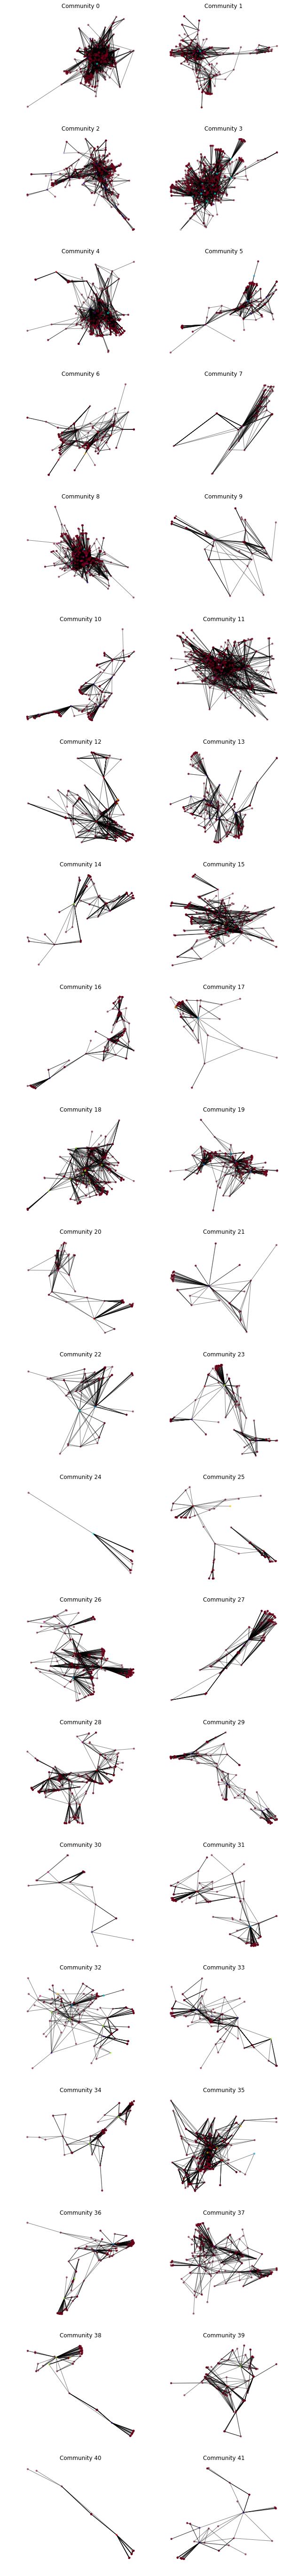

In [40]:
# plot each community:
fig = plt.figure(figsize=(10, 100))
comms = set(parts.values())
for i, comm_id in enumerate(comms, 1):
    ax = fig.add_subplot(np.floor(num_comm / 2), 2, i)
    # find those nodes belonging to this community:
    nodes_from_comm = [
        node_id for (node_id, c) in parts.items() if c == comm_id
    ]
    # Generate the subgrph belonging to these nodes:
    subG = nx.subgraph(main_gcc, nodes_from_comm)
    ax.axis('off')
    ax.set_title('Community {}'.format(comm_id))
    nx.draw_networkx(
        subG,
        pos=pos_gcc,
        ax=ax,
        node_color=color_by_inst(subG),
        node_size=10,
        alpha=.5,
        with_labels=False)
ax = add_inst_labels(ax)
plt.savefig(
    "IMG/full_graph-compareSubCommunities.pdf", format='pdf', bbox_inches="tight")

In [ ]:
# plot each community:
fig = plt.figure(figsize=(10, 100))
comms = set(parts.values())
for i, comm_id in enumerate(comms, 1):
    ax = fig.add_subplot(num_comm / 2, 2, i)
    # find those nodes belonging to this community:
    nodes_from_comm = [
        node_id for (node_id, c) in parts.items() if c == comm_id
    ]
    # Generate the subgrph belonging to these nodes:
    subG = nx.subgraph(main_gcc, nodes_from_comm)
    subsubG = nx.subgraph(subG, poinf_in_gcc)
    ax.axis('off')
    ax.set_title('Community {}'.format(comm_id))
    nx.draw_networkx(
        subsubG,
        pos=pos_gcc,
        ax=ax,
        node_color=color_by_inst(subsubG),
        node_size=20,
        with_labels=False)
ax = add_inst_labels(ax)
plt.savefig(
    "IMG/full_graph-compareSubCommunities-rmExt.pdf",
    format='pdf',
    bbox_inches="tight")